The VGG() class takes a few arguments

1) include_top (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

2) weights (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

3) input_tensor (None): A new input layer if you intend to fit the model on new data of a different size.

4) input_shape (None): The size of images that the model is expected to take if you change the input layer.

5) pooling (None): The type of pooling to use when you are training a new set of output layers.

6) classes (1000): The number of classes (e.g. size of output vector) for the model.

In [2]:
# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning.ipynb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import cifar10

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [4]:
print(len(trainX),trainX.shape)
print(len(trainy))
print(len(testX),testX.shape)
print(len(testy))

50000 (50000, 32, 32, 3)
50000
10000 (10000, 32, 32, 3)
10000


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()

In [6]:
catagories = {'dog': 0,'automobile': 1,'bird': 2,'cat': 3,'deer': 4,'airplane': 5,'frog': 6,'horse': 7,'ship': 8,'truck': 9}
reverse_catagory = {n:i for i,n in catagories.items()}
print(reverse_catagory)

{0: 'dog', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'airplane', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [7]:
import tensorflow_datasets as tfds

In [8]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  output = []
  output.append(image)
  output.append(label[0])
  return output

In [ ]:
train_dataset = []
validation_dataset = []
test_dataset = []

for img_num in range(45000):
  train_dataset.append(format_example(trainX[img_num],trainy[img_num]))


In [ ]:
for img_num in range(45000,len(trainX)+1):
  validation_dataset.append(format_example(trainX[img_num],trainy[img_num]))

for img_num in range(len(testX)):
  train_dataset.append(format_example(testX[img_num],testy[img_num]))

print(len(train_dataset),len(validation_dataset),len(train_dataset))

In [11]:
X_train = trainX[:45000]
y_train = trainy[:45000]
X_valid = trainX[45000:]
y_valid = trainy[45000:]
X_test = trainX
y_test = trainy

(32, 32, 3)
(32, 32, 3)


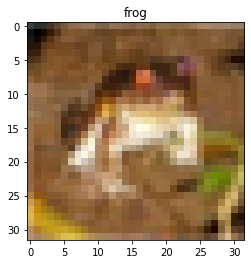

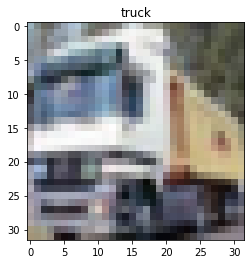

In [28]:
for i in range(2):
  plt.figure()
  plt.imshow(X_train[i])
  # print("reverse_catagory[y_train[i]]: ",reverse_catagory[y_train[i][0]])
  plt.title(reverse_catagory[y_train[i][0]])
  print(X_train[i].shape)